# $\pi$

U ovoj bilježnici proučit ćemo nekoliko formula za slavnu matematičku konstantu $\pi$, i usporediti njihovu konvergenciju.

## Arhimed (stari vijek)

Prvi algoritam za računanje $\pi$ je dao Arhimed (oko 250. pr. Kr.), koristeći iduću zanimljivu ideju. Promotrimo grafove:

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import numpy as np
%matplotlib inline

#NACRTAJ GRAFOVe
def crtaj(n):
    "Ova funkcija crta krug i njemu upisani i opisani 3*2^n-terokut."
    k = n
    #Ovdje koristimo pi samo radi jednostavnosti
    alpha = np.pi/k
    print(k)
    
    fig, ax = plt.subplots()
    # create 3x3 grid to plot the artists
    grid = np.mgrid[0.2:0.8:10j, 0.2:0.9:10j].reshape(2, -1).T

    patches = []

    #dodaj krug
    circle = mpatches.Circle(grid[0], 0.1, ec="none")
    patches.append(circle)

    #dodaj opisani n-terokut
    polygon = mpatches.RegularPolygon(grid[0], k, 0.1/np.cos(alpha))
    patches.append(polygon)

    #dodaj upisani n-terokut
    polygon = mpatches.RegularPolygon(grid[0], k, 0.1)
    patches.append(polygon)

    colors = np.linspace(0, 1, len(patches))
    collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.4)
    collection.set_array(np.array(colors))
    ax.add_collection(collection)

    plt.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.tight_layout()

    plt.show()
    return;

interact(crtaj, n=widgets.IntSlider(min=3,max=20,step=1,value=3));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0zLCBkZXNjcmlwdGlvbj11J24nLCBtYXg9MjAsIG1pbj0zKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWnigKY=


Vidimo da će se opsezi $n$-terokuta proizvoljno blizu približiti opsegu kruga. Opseg n-terokuta $n*2R\sin\left(\frac{\pi}{n}\right)$ geometrijski vidimo da teži u $2R\pi$. Ustvari, ovo je samo slavni limes $\lim\limits_{x\to 0} \frac{\sin x}{x}$ u dvije tisuće godina starom izdanju. No, razlog zašto ovo daje efektivni algoritam za računanje $\pi$ je (naravno) taj što nam *ne treba* $\pi$ unaprijed! Možemo koristiti formulu $\sin \alpha = \sqrt{\frac{1-\cos 2\alpha}{2}}$ te tako dobivati sve manje kutove i aproksimativno računati limes.

Arhimed je ovom metodom ustvrdio nejednakost $\frac{223}{71}<\pi<\frac{22}{7}$, gdje je gornja ograda dobro poznata aproksimacija od $\pi$. Ovo je bila glavna metoda računanja aproksimacija za $\pi$ za tisućljeće i pol! Arhimedov račun kreće od jednakostraničnog trokuta (dakle $n=3$) te nastavlja raspolovljavanjem. Promotrimo rezultate Arhimedove metode:

In [173]:
import sympy as sp
sp.init_printing()

def sn(n):
    k = 3*2**n
    if k == 3:
        return sp.sin(sp.pi/3)
    else:
        cs = sp.sqrt(1-sn(n-1)**2) #pitagorin poucak
        return sp.sqrt((1-cs)/2)

def calc(n):
    #convert sympy to latex
    str = sp.latex(3*2**n*sn(n))
    str = '$' + str + '$'

    #cheat: s matplotlib iscrtaj latex jer neće drugačije
    import matplotlib.pyplot as plt
    %matplotlib inline

    fig = plt.figure()
    fig.suptitle(str, fontsize=14+n, fontweight='bold')

    ax = fig.add_subplot(111)
    fig.set_size_inches(0.05, 0.05, forward=True)
    plt.axis('off')

    plt.show()
    print(sp.N(3*2**n*sn(n)))
    return;

interact(calc, n=widgets.IntSlider(min=0,max=10,step=1,value=0));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J24nLCBtYXg9MTApLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWRnZXQtaW50ZXJhY3TigKY=


<function calc at 0x0A548A70>


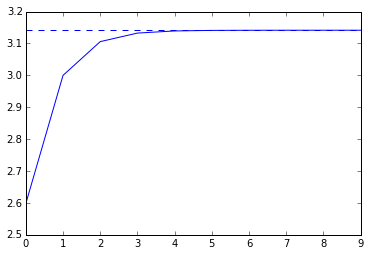

In [176]:
import matplotlib.pyplot as plt
import numpy as np

def rez(n):
    return 3*2**n*sn(n);
nprez = np.vectorize(rez)

fig, ax = plt.subplots()
plt.axhline(y=np.pi, xmin=0, xmax=1, hold=None, linestyle='--')
ax.plot(np.arange(10), nprez(np.arange(10)))
ax.legend(loc=9)

Za $n=10$ dobivamo $\pi$ na 5 decimala što ukazuje na to da je konvergencija dobra. To je također ilustrirano gornjim grafom.
Naravno, zbog uzastopnog računa drugog korijena ova metoda je složena i postići veliku preciznost ovom metodom se čini uzaludno. *Ipak*, ovo je ista metoda kojom je Ludolph van Ceulen računao $\pi$ do $35$ decimala, po čemu je $\pi$ nekad zvan i *Ludolphov broj* (da dobije tu točnost morao je koristit $2^{62}$-terokut. U nedostatku pametnog posla, 1630, je ova aproksimacija još poboljšana na 38 decimala (za što je pak trebalo cca. $10^{40}$-terokut). Time vidimo i da je konvergencija otprilike logaritamska u broju stranica!